In [2]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
# Original Data Path
original_dataset_dir = './datasets/train'

# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [4]:
# Train, Validation, Test Data
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [7]:
# file copy

# fnames = []
# for i in range(1000):
#     filename = f'cat.{i}.jpg'
#     fnames.append(filename)

# Cat train data copy
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

# Dog train data copy
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [11]:
# Cat validation data copy
fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

# Dog validation data copy
fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [12]:
# Cat test data copy
fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

# Dog test data copy
fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [13]:
print('Train cat images: ',len(os.listdir(train_cats_dir)))
print('Train dog images: ',len(os.listdir(train_dogs_dir)))
print('Validation cat images: ',len(os.listdir(validation_cats_dir)))
print('Validation dog images: ',len(os.listdir(validation_dogs_dir)))
print('Test cat images: ',len(os.listdir(test_cats_dir)))
print('Test dog images: ',len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [16]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) #이미지가 컬러이므로 3채널
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [40]:
# Data Preprocessing
# Tensor로 바꾸는 작업
# Image scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # 픽셀값을 0~1로 scaling
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size = (150,150),
                                 batch_size = 20,
                                 class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                 target_size = (150,150),
                                 batch_size = 20,
                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch,labels_batch in train_generator:
    print('Batch Data Size: ',data_batch.shape)
    print('Batch Label Size: ',labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=50
) # steps per epoch * batch size <= 총 샘플수 , steps per epoch는 이미지를 처리하는 단위 (경사하강법 단위)

Epoch 1/30
100/100 [==============================] - 66s 658ms/step - loss: 0.7903 - accuracy: 0.5225 - val_loss: 0.6837 - val_accuracy: 0.5140
Epoch 2/30
100/100 [==============================] - 59s 594ms/step - loss: 0.6880 - accuracy: 0.5600 - val_loss: 0.6618 - val_accuracy: 0.5850
Epoch 3/30
100/100 [==============================] - 60s 598ms/step - loss: 0.6446 - accuracy: 0.6315 - val_loss: 0.6812 - val_accuracy: 0.5560
Epoch 4/30
100/100 [==============================] - 59s 595ms/step - loss: 0.6113 - accuracy: 0.6780 - val_loss: 0.6136 - val_accuracy: 0.6810
Epoch 5/30
100/100 [==============================] - 59s 591ms/step - loss: 0.5731 - accuracy: 0.7225 - val_loss: 0.5736 - val_accuracy: 0.7120
Epoch 6/30
100/100 [==============================] - 59s 590ms/step - loss: 0.5043 - accuracy: 0.7580 - val_loss: 0.6550 - val_accuracy: 0.6840
Epoch 7/30
100/100 [==============================] - 59s 591ms/step - loss: 0.4269 - accuracy: 0.8080 - val_loss: 0.6774 - val_ac

In [27]:
model.save('cats_and_dogs_small_1.0.h5') # 케라스 모델의 확장자는 h5

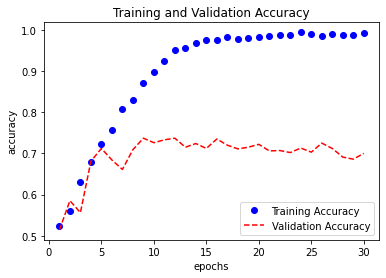

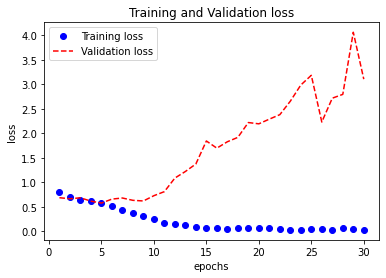

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'r--',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r--',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [31]:
# 학습 데이터가 부족하여 일어나는 과적합을 줄여야 함
datagen = ImageDataGenerator(
    rotation_range = 40, # rotate 범위
    width_shift_range = 0.2, # 20% 이내 좌우로 rotate
    height_shift_range = 0.2, # 상하로 rotate
    shear_range = 0.2, # 기울기 범위
    zoom_range = 0.2,
    horizontal_flip = True, # 좌우반전
    fill_mode = 'nearest' # 이미지를 옆이나 위로 밀면 빈칸이 생김 , 빈칸처리
)

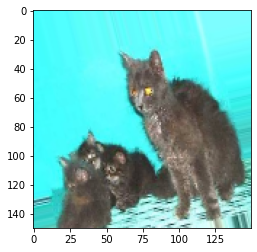

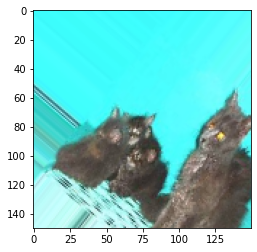

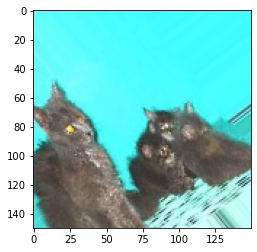

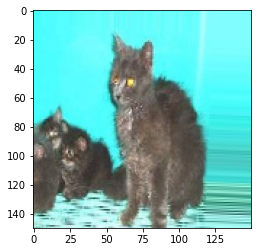

In [38]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[4]
img = image.load_img(img_path,target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break
plt.show()

In [43]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리        
    train_dir,
    # 모든 이미지를 150 × 150 크기로 바꿉니다
    target_size=(150, 150),
    batch_size=32,
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
10/10 [==============================] - 15s 1s/step - loss: 0.6741 - accuracy: 0.6313 - val_loss: 0.5953 - val_accuracy: 0.6880
Epoch 2/30
10/10 [==============================] - 15s 2s/step - loss: 0.6515 - accuracy: 0.6500 - val_loss: 0.5860 - val_accuracy: 0.6500
Epoch 3/30
10/10 [==============================] - 16s 2s/step - loss: 0.6141 - accuracy: 0.6562 - val_loss: 0.5597 - val_accuracy: 0.7040
Epoch 4/30
10/10 [==============================] - 15s 2s/step - loss: 0.5903 - accuracy: 0.6844 - val_loss: 0.8832 - val_accuracy: 0.6270
Epoch 5/30
10/10 [==============================] - 15s 1s/step - loss: 0.6579 - accuracy: 0.6812 - val_loss: 0.8163 - val_accuracy: 0.5980
Epoch 6/30
10/10 [==============================] - 14s 1s/step - loss: 0.6992 - accuracy: 0.6151 - val_loss: 0.5871 - val_accuracy: 0.6730
Epoch 7/30
10/10 [==============================] - 15s 1s/step - loss: 0.60

KeyboardInterrupt: 